In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df.shape

(2048, 64)

In [3]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.509822,0.940759,-7.682106e-07,0.415943,0.899614,-0.028853,0.335405,0.799790,-0.048777,0.278940,...,0.588775,0.505807,-0.069050,0.590975,0.425538,-0.079898,0.587825,0.349683,-0.081121,iloveu
1,0.530379,0.893766,-5.965160e-07,0.446797,0.853565,-0.027086,0.372829,0.748014,-0.046034,0.317478,...,0.648977,0.494159,-0.074054,0.658295,0.416641,-0.086112,0.663083,0.345444,-0.087870,iloveu
2,0.570124,0.889939,-6.842005e-07,0.488169,0.836906,-0.028741,0.424215,0.708969,-0.046068,0.378187,...,0.719677,0.497042,-0.071847,0.736593,0.418957,-0.083981,0.749222,0.345320,-0.085557,iloveu
3,0.599766,0.867179,-6.888274e-07,0.525081,0.818602,-0.027215,0.465612,0.680927,-0.041659,0.428515,...,0.773867,0.491406,-0.077308,0.795706,0.417629,-0.091025,0.811806,0.343092,-0.093625,iloveu
4,0.610382,0.868628,-8.183105e-07,0.533286,0.813803,-0.025460,0.475881,0.673990,-0.037655,0.440546,...,0.781818,0.487525,-0.067989,0.806269,0.411458,-0.082696,0.825905,0.336489,-0.087315,iloveu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,0.603662,0.780057,1.056681e-07,0.537767,0.788298,0.012575,0.499725,0.755683,0.016517,0.474138,...,0.458477,0.652541,-0.045237,0.427246,0.633411,-0.051660,0.401982,0.613363,-0.055780,salute
2044,0.605646,0.786017,9.545772e-08,0.541459,0.794975,0.009017,0.500661,0.764150,0.010604,0.473374,...,0.455961,0.654940,-0.041441,0.425821,0.636265,-0.044782,0.400972,0.616924,-0.047156,salute
2045,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,salute
2046,0.677910,0.790733,4.054627e-07,0.628758,0.798069,-0.019796,0.589737,0.746092,-0.035199,0.571285,...,0.598460,0.598735,-0.096921,0.569729,0.564683,-0.109949,0.546290,0.530272,-0.117436,salute


In [4]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (2048, 63)
Labels shape = (2048,)


In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='linear')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1, kernel='linear')

In [6]:
y_pred = svm.predict(x_test)
y_pred


array(['namaste', 'ok', 'namaste', 'salute', 'namaste', 'namaste',
       'salute', 'namaste', 'salute', 'ok', 'namaste', 'namaste',
       'iloveu', 'ok', 'name is', 'name is', 'ok', 'name is', 'ok',
       'name is', 'namaste', 'name is', 'salute', 'salute', 'namaste',
       'ok', 'namaste', 'iloveu', 'ok', 'namaste', 'ok', 'iloveu',
       'iloveu', 'namaste', 'ok', 'salute', 'name is', 'salute', 'iloveu',
       'salute', 'salute', 'ok', 'namaste', 'namaste', 'namaste',
       'salute', 'name is', 'ok', 'ok', 'ok', 'ok', 'salute', 'ok',
       'iloveu', 'iloveu', 'namaste', 'ok', 'salute', 'ok', 'salute',
       'namaste', 'iloveu', 'ok', 'namaste', 'namaste', 'namaste',
       'salute', 'salute', 'namaste', 'salute', 'namaste', 'namaste',
       'salute', 'salute', 'ok', 'namaste', 'name is', 'name is',
       'salute', 'namaste', 'namaste', 'ok', 'namaste', 'name is',
       'namaste', 'iloveu', 'iloveu', 'ok', 'namaste', 'namaste', 'ok',
       'namaste', 'ok', 'iloveu', 'namas

In [7]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(0.7878048780487805, 0.7878048780487805, 0.7878048780487805)

<AxesSubplot: title={'center': 'Confusion Matrix - indian sign language'}>

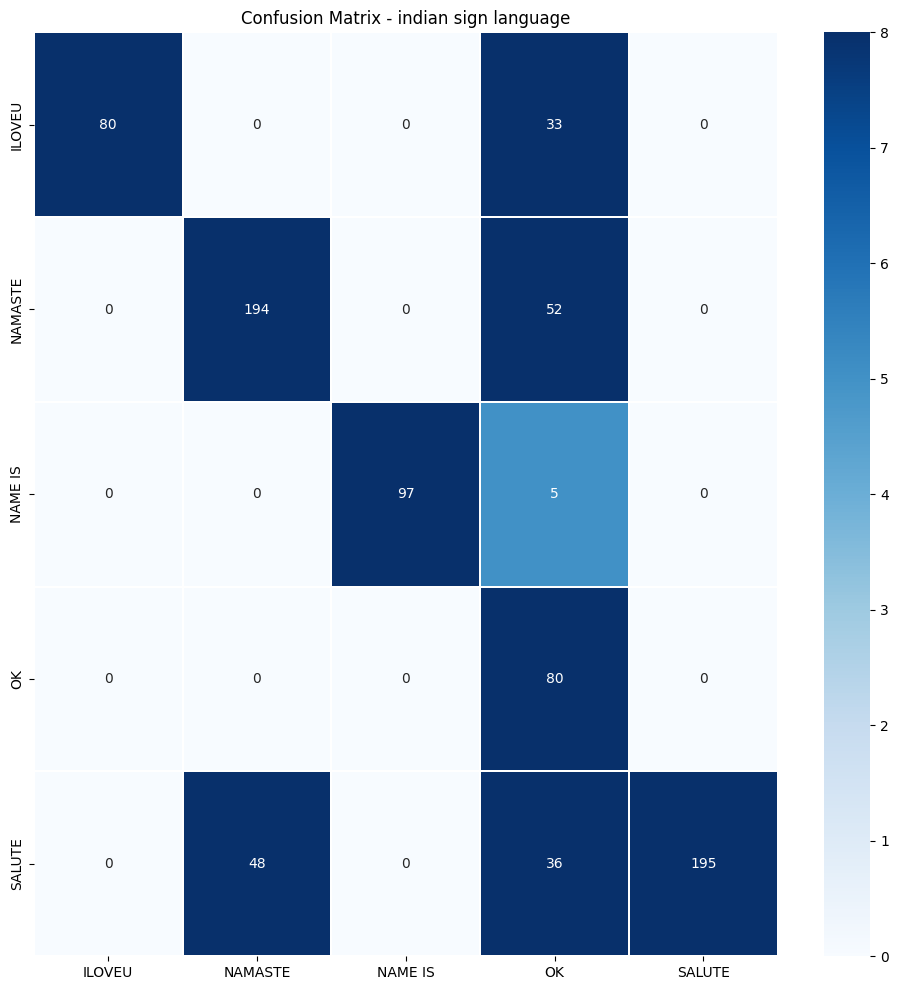

In [8]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - indian sign language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [9]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)